## Useful functions

In [13]:
# libraries to import
import numpy as np
import matplotlib.pyplot as plt
from LinearBanditTS import *
import matplotlib.pyplot as plt

# Week 4-8

## Goals and Objectives

### Make Thompson sampling algoirthm for linear bandits

Over 100 runs

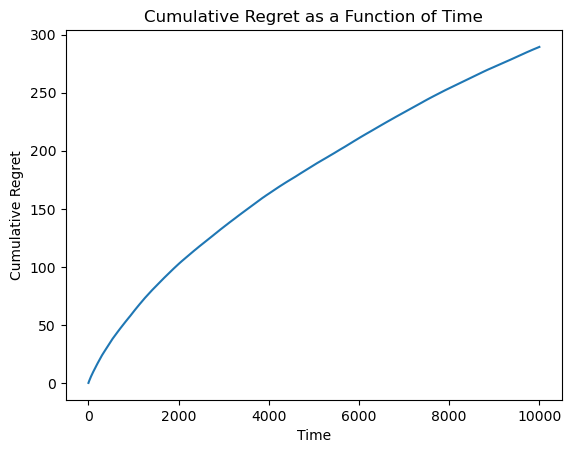

In [10]:
# Setup
d = 5
num_items = 10
num_rounds = 10000
sigma_noise = 1.0
# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))
# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d

regrets = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, 1)
# Plot the regret
plot_regret(regrets)

# Setup
nbr_runs = 100
run_and_plot_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, nbr_runs)


### Variation of the number of dimensions

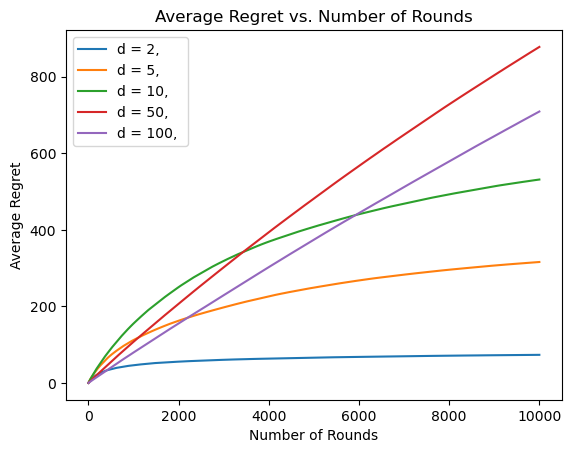

In [42]:
d_values = [2, 5, 10, 50, 100]#, 500, 1000, 5000, 10000]  # List of dimensions to test
num_items_values = [50]  # List of the number of items to test
alpha_values = [1.0]  # List of alpha values to test
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 100

run_experiments(d_values, num_items_values, alpha_values, num_rounds, sigma_noise, nbr_runs)


In the resulting plot, you will observe how the average regret changes with different dimensions (d_values) for the linear Thompson sampling algorithm. The following dimensions are tested: 2, 5, 10, 50, and 100. The number of items is fixed at 50, alpha at 1.0, and the experiments are run for 10000 rounds with 100 runs for each configuration.

For low dimensions (1 to 10), the regret curve resembles a logarithmic function. Initially, the regret increases rapidly but gradually slows down. This behavior suggests that the algorithm performs well in low-dimensional settings, learning quickly from the available data and converging towards an optimal solution.

However, when the dimension is higher (50, 100), the algorithm appears to struggle with effectively learning from the data within the given number of rounds. In these cases, the regret curve seems to increase linearly, indicating that the algorithm is not converging as quickly to an optimal solution. This can be attributed to the increased complexity of the problem as the dimensionality increases, making it more challenging for the algorithm to learn an optimal solution within the given number of rounds.

To summarize, the linear Thompson sampling algorithm performs well in low-dimensional settings, with the regret curve showing logarithmic growth. As the dimensionality increases, the algorithm struggles to converge quickly to an optimal solution, leading to a linear increase in regret. This highlights the importance of considering the dimensionality of the problem when employing this algorithm and adjusting the number of rounds accordingly to ensure efficient learning.

### Variation of the number of items

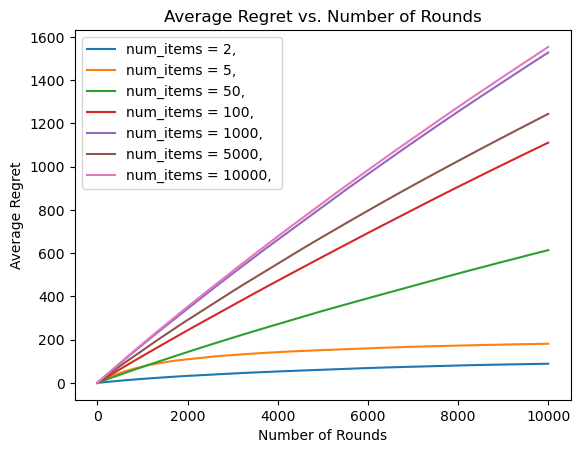

In [10]:
#Variation of the number of items
d_values_2 = [50]  # List of dimensions to test
num_items_values_2 = [2, 5, 50, 100, 1000, 5000, 10000]  # List of the number of items to test
alpha_values_2 = [1.0]  # List of alpha values to test
num_rounds_2 = 10000
sigma_noise_2 = 1.0
nbr_runs_2 = 100

run_experiments(d_values_2, num_items_values_2, alpha_values_2, num_rounds_2, sigma_noise_2, nbr_runs_2)

In the resulting plot, you will observe how the average regret changes with different numbers of items (num_items_values_2) for the linear Thompson sampling algorithm. The following numbers of items are tested: 2, 5, 50, 100, 1000, 5000, and 10000. The dimension is fixed at 50, alpha at 1.0, and the experiments are run for 10000 rounds with 100 runs for each configuration.

When the number of items is low (2, 5), the regret curve quickly stabilizes, indicating that the algorithm converges rapidly to an optimal solution. As the number of items increases, the regret curve tends to grow linearly, suggesting that the algorithm struggles to learn efficiently from the available data.

However, there is an interesting observation: the regret curve when num_items = 1000 is almost the same as when num_items = 10000. Moreover, when num_items = 5000, the regret increases less than when the num_items is 10000 or 1000. This phenomenon could be due to multiple reasons:

Considering the results with 100 runs, the convergence speed and local optima explanations become more plausible as potential reasons for the observed behavior:

Convergence speed: It is possible that the algorithm's convergence speed is sensitive to the specific item features, leading to different regret curves for different numbers of items. When the number of items is large, the algorithm may require more rounds to effectively learn from the data, causing the regret to increase more substantially.

Local optima: The algorithm could get stuck in local optima for specific configurations of item features, causing the regret curve to appear similar for different numbers of items. This effect may be more pronounced when the number of items is large, as the search space becomes more complex and finding the optimal solution becomes more challenging.

It is important to note that these results are based on the specific item features and true theta used in the experiments, so it is not guaranteed that this behavior will be consistent across different settings. To get a better understanding of this phenomenon, one could run additional experiments with different item features, true theta values, and noise levels to see if the observed behavior persists.

### Variation of the number of alphas

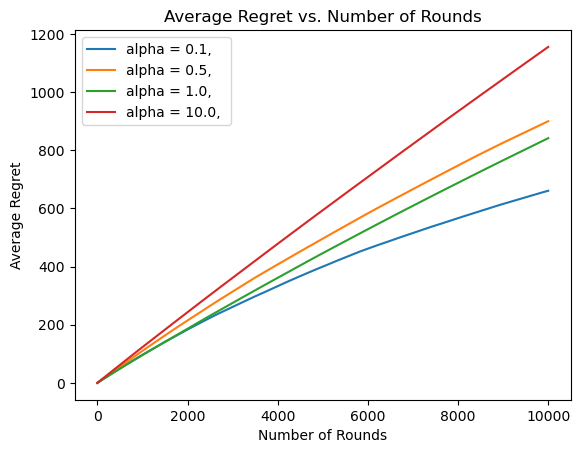

In [9]:
#Variation of the number of alphas
d_values_3 = [50]  # List of dimensions to test
num_items_values_3 = [100]  # List of the number of items to test
alpha_values_3 = [0.1, 0.5, 1.0, 10.0]  # List of alpha values to test
num_rounds_3 = 10000
sigma_noise_3 = 1.0
nbr_runs_3 = 100

run_experiments(d_values_3, num_items_values_3, alpha_values_3, num_rounds_3, sigma_noise_3, nbr_runs_3)

When the alpha value is small (e.g., 0.1), the regret is the lowest among the different alpha values tested. This is because smaller alpha values result in more conservative exploration, as the confidence region around the current estimate of theta is smaller. As a result, the algorithm is less likely to make large mistakes and incurs lower regret.

As the alpha value increases (e.g., 0.5, 1.0, 10.0), the regret becomes higher. This is because larger alpha values lead to more aggressive exploration, as the confidence region around the current estimate of theta is larger. Consequently, the algorithm is more likely to make larger mistakes, which leads to higher regret.

However, it is worth noting that the difference in regret at t = 10,000 is not very significant, especially between alpha values of 0.1, 0.5, and 1.0. The regret values range from ~600 to ~850 for these alpha values. This suggests that, in this particular setting, the choice of alpha within this range does not have a drastic impact on the regret incurred by the algorithm.

For the alpha value of 10.0, the regret is notably higher, at ~1200. This indicates that an overly aggressive exploration strategy may not be as effective in this setting and can lead to a substantially higher regret.

In conclusion, it appears that the choice of alpha does have an impact on the performance of Thompson Sampling, but for this specific configuration, the differences are not very pronounced, especially within the range of 0.1 to 1.0. As always, it is essential to consider that these results are based on the specific item features and true theta used in the experiments, and the observed behavior may not be consistent across different settings. To get a better understanding of the impact of alpha, one could run additional experiments with different item features, true theta values, and noise levels.

### Conclusion

The impact of dimensionality:

For low dimensions (1 to 10), the regret increases logarithmically, with a steep increase initially that slows down over time.
For higher dimensions (50, 100), the number of rounds (10,000) is insufficient for the algorithm to perform effectively, and the regret appears to increase linearly.

The impact of the number of items:

For a small number of items (2, 5), the regret quickly stabilizes, suggesting that the algorithm performs well in these settings.
As the number of items increases (50, 100, 1000, 5000, 10000), the regret also increases. However, there is an odd phenomenon where the regret for 1000 items is similar to 10,000 items, and the regret for 5000 items is lower than both. This could be due to the specific item features and true theta used in the experiments, as well as the variability introduced by the multiple runs.

The impact of the alpha value:

Lower alpha values (e.g., 0.1) result in more conservative exploration and lower regret, while higher alpha values (e.g., 10.0) lead to more aggressive exploration and higher regret.
The difference in regret for alpha values between 0.1 and 1.0 is not very pronounced, suggesting that the choice of alpha within this range does not have a drastic impact on the regret incurred by the algorithm in this specific setting.



Based on the experiments conducted, it appears that the dimensionality of the problem has the most significant impact on the algorithm's performance. As the dimensionality increases, the algorithm struggles to perform effectively within the given number of rounds.

The second most influential parameter is the number of items. As the number of items increases, the regret incurred by the algorithm also increases, although there are some peculiar observations in specific settings, as discussed earlier.

Lastly, the alpha value has the least impact on the algorithm's performance within the tested range. While there is some difference in regret based on the alpha value, the variation is not as pronounced as it is for the other two parameters.

To conclude, these experiments highlight some of the factors that influence the performance of the Thompson Sampling algorithm for linear bandits.  It is essential to consider that these results are based on specific item features, true theta values, and noise levels, and the observed behavior may not be consistent across different settings. Therefore, it is crucial to perform additional experiments with different configurations to gain a deeper understanding of the algorithm's performance and adapt it to different real-world scenarios.